In [1]:
cd /om2/user/leokoz8/code/rnns-of-rnns

/net/vast-storage.ib.cluster/scratch/vast/fiete/leokoz8/code/rnns-of-rnns


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import tqdm
from src import models, utils, parametrizations,tasks,running
import os 
envs, env_names = tasks.load_all_mod_cog_tasks()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import pickle
filepath = '/om2/user/leokoz8/code/rnns-of-rnns/models/spectral/dlygointr/conformal/perf_over_training.pickle'
file = torch.load(filepath)
#file
base_directory = '/om2/user/leokoz8/code/rnns-of-rnns/models/'

def parse_gw_info(file_path):
    split_path = file_path.split(os.sep)
    intra = split_path[7]
    task = split_path[8]
    inter = split_path[9]
    
    return task, intra, inter

def get_perf_info(perf_curve):
    perf = perf_curve[perf_curve != 0]
    final_perf = perf[-1]
    time_to_finish = len(perf)
    return perf,final_perf,time_to_finish

def find_string_positions(strings_list, target_string):
    positions = []
    for index, string in enumerate(strings_list):
        if string == target_string:
            positions.append(index)

    return positions

def extract_elements_by_indices(input_list, indices):
    extracted_elements = [input_list[index] for index in indices]
    return extracted_elements


In [68]:
# loop over models folder and extract dictionary of {stability constraint, interareal constraint, perf, final perf, time_to_final}

tasks = []
intras = []
inters = []
perfs = []
final_perfs = []
time_to_finishes = []

for root, dirs, files in os.walk(base_directory):
    for i, file in enumerate(files):
        if file == "perf_over_training.pickle":
            
            
            file_path = os.path.join(root, file)
            
            
            task, intra, inter = parse_gw_info(file_path)  
            
            
            
            tasks.append(task)
            intras.append(intra)
            inters.append(inter)
            
            
            
            perf_curve = torch.load(file_path)
            
            perf,final_perf,time_to_finish = get_perf_info(perf_curve)
            
            
            perfs.append(perf.detach().cpu().numpy())
            final_perfs.append(final_perf.item())
            time_to_finishes.append(time_to_finish)
            
            
            
            
            
            
                #with open(file_path, 'rb') as f:
                    #data = pickle.load(f)
                #pickle_files[file_path] = data

    #return pickle_files

In [111]:
possible_inters= ['None','conformal']
possible_intras = ['None','sym','spectral']
configs = []

for inter in possible_inters:
    
    inter_positions = find_string_positions(inters, inter)  
    
    for intra in possible_intras:
        
        intras_given_inters = extract_elements_by_indices(intras, inter_positions)
        
        intra_positions = find_string_positions(intras_given_inters, intra)
        
        
        config = (inter,intra)
        
        configs.append((config,intra_positions))
        
        
        
        
        
        
    



[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

0.9232258066054313
0.8941129023028959
0.9247580632086723
nan
0.9247580632086723
0.9232258066054313


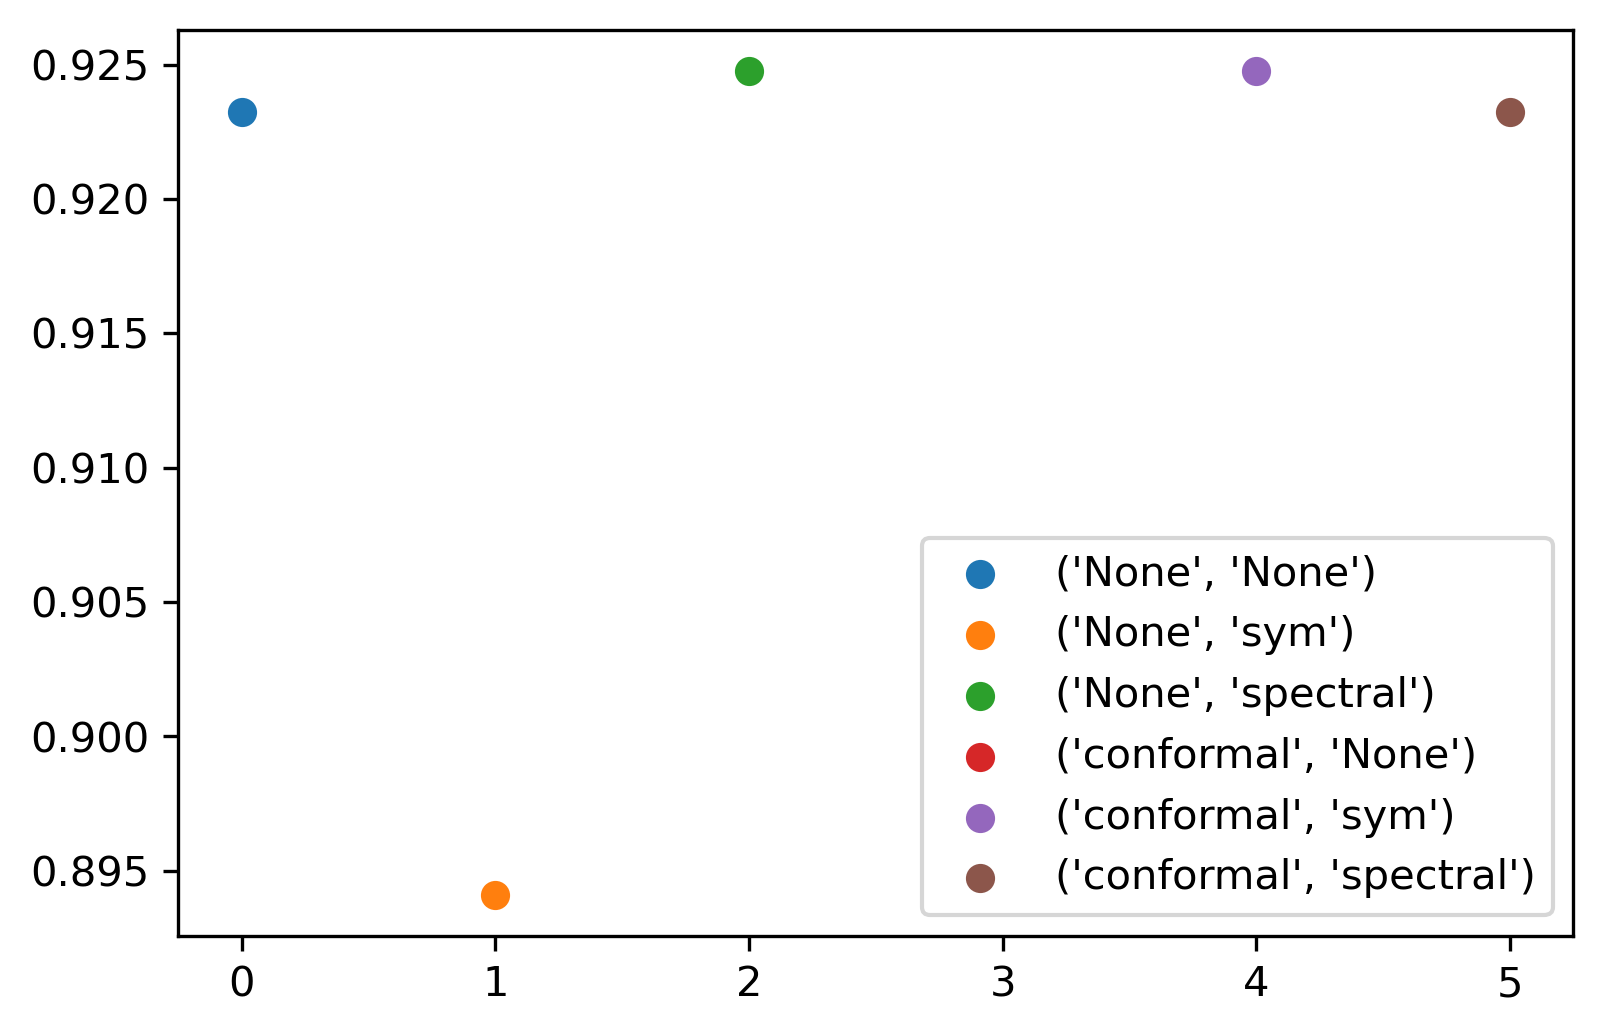

In [153]:
fig = plt.figure(dpi = 300)

for i, config in enumerate(configs):
    raw_perfs = extract_elements_by_indices(final_perfs, configs[i][1]) 
    raw_times = extract_elements_by_indices(time_to_finishes, configs[i][1]) 
    
    plt.scatter(i, np.mean(np.asarray(raw_perfs)), label = configs[i][0] )
    print(np.mean(np.asarray(raw_perfs)))
    
plt.legend()